In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_df = pd.read_csv('train.csv')
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Cleaning: Duplicating previous values and adding missing info

In [4]:
data_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data_df.Cabin = data_df.Cabin.fillna("Unknown")
data_df = data_df.ffill(0)
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,19.0,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
data_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Viewing data: Visualization

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


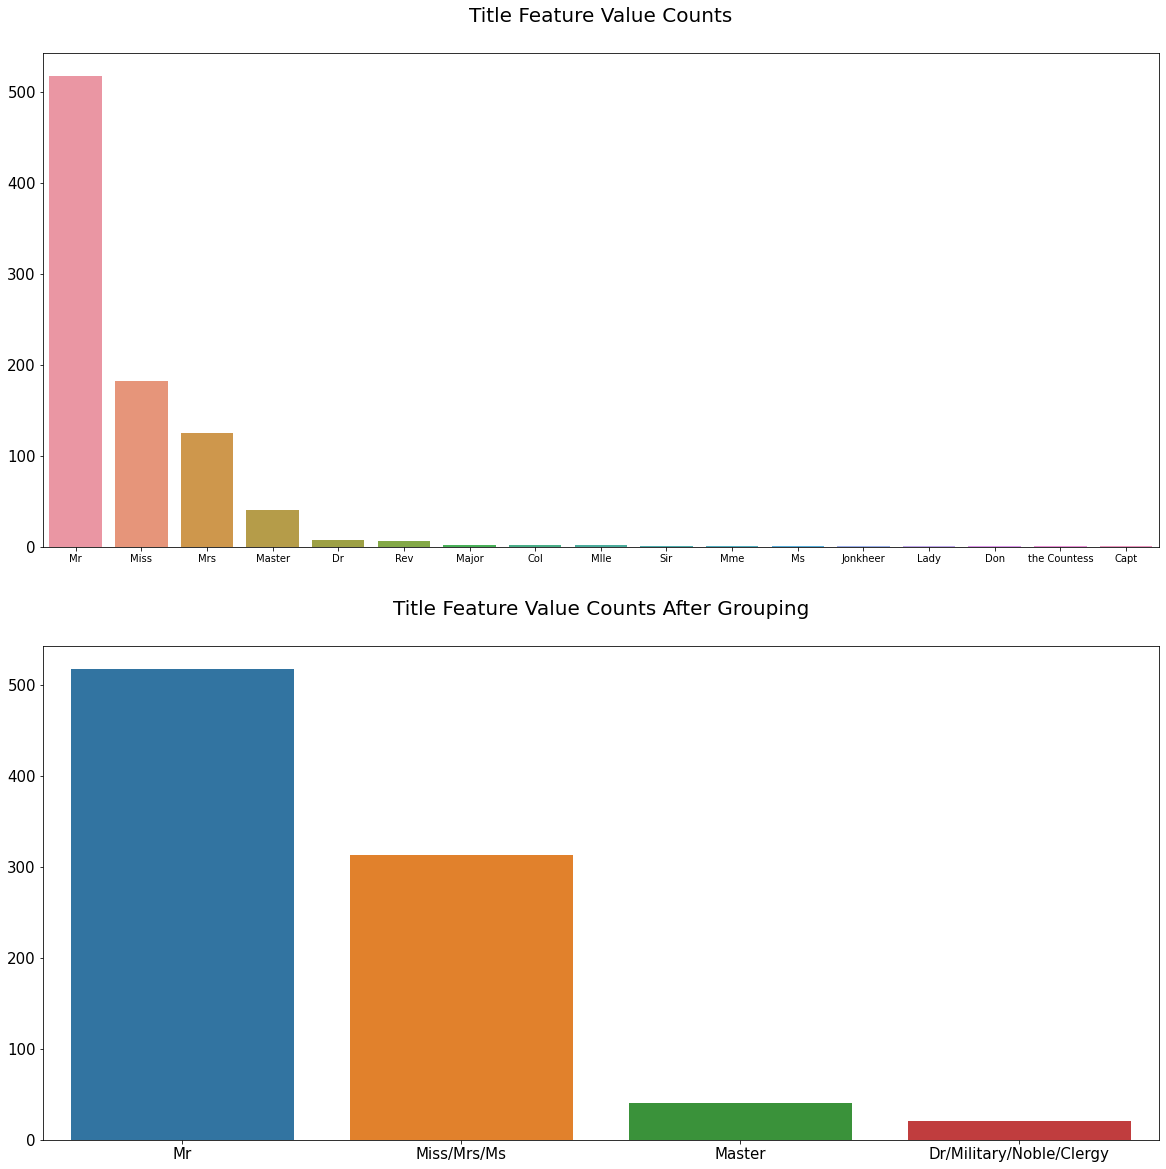

In [7]:
data_df['Title'] = data_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
data_df['Is_Married'] = 0
data_df['Is_Married'].loc[data_df['Title'] == 'Mrs'] = 1

fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=data_df['Title'].value_counts().index, y=data_df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

data_df['Title'] = data_df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
data_df['Title'] = data_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=data_df['Title'].value_counts().index, y=data_df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

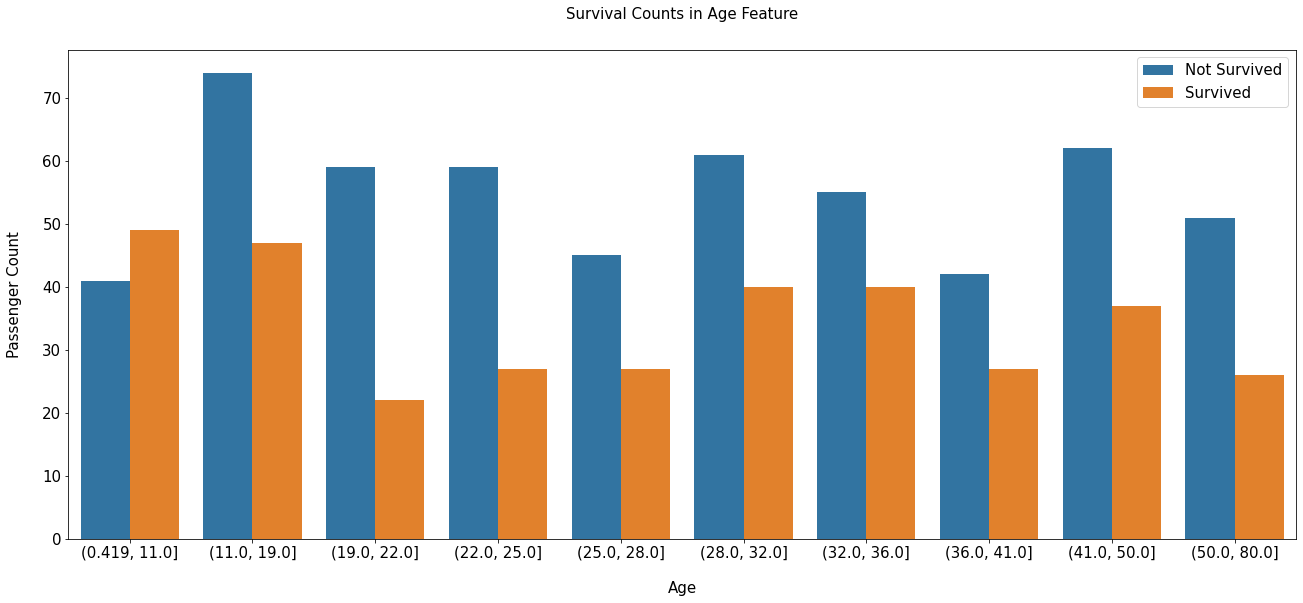

In [8]:
data_df['Age'] = pd.qcut(data_df['Age'], 10)

fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', data=data_df)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)

plt.show()

In [9]:
family = []

for i in data_df.index:
  if data_df['SibSp'][i] > 0 or data_df['Parch'][i] > 0:
    family.append('Family')
  else:
    family.append('Single')

family

['Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Single',
 'Family',
 'Family',
 'Family',
 'Family',
 'Single',
 'Single',
 'Family',
 'Single',
 'Single',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Single',
 'Family',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Single',
 'Family',
 'Family',
 'Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Family',
 'Single',
 'Family',
 'Family',
 'Family',
 'Single',
 'Family',
 'Family',
 'Family',
 'Single',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',
 'Single',
 'Single',
 'Family',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Single',
 'Family',
 'Family',
 'Single',
 'Family',
 'Single',
 'Single',

In [10]:
data_df['Booking'] = family
data_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_Married,Booking
0,1,0,3,"Braund, Mr. Owen Harris",male,"(19.0, 22.0]",1,0,A/5 21171,7.2500,Unknown,S,Mr,0,Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(36.0, 41.0]",1,0,PC 17599,71.2833,C85,C,Miss/Mrs/Ms,1,Family
2,3,1,3,"Heikkinen, Miss. Laina",female,"(25.0, 28.0]",0,0,STON/O2. 3101282,7.9250,Unknown,S,Miss/Mrs/Ms,0,Single
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(32.0, 36.0]",1,0,113803,53.1000,C123,S,Miss/Mrs/Ms,1,Family
4,5,0,3,"Allen, Mr. William Henry",male,"(32.0, 36.0]",0,0,373450,8.0500,Unknown,S,Mr,0,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,"(25.0, 28.0]",0,0,211536,13.0000,Unknown,S,Dr/Military/Noble/Clergy,0,Single
887,888,1,1,"Graham, Miss. Margaret Edith",female,"(11.0, 19.0]",0,0,112053,30.0000,B42,S,Miss/Mrs/Ms,0,Single
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(11.0, 19.0]",1,2,W./C. 6607,23.4500,Unknown,S,Miss/Mrs/Ms,0,Family
889,890,1,1,"Behr, Mr. Karl Howell",male,"(25.0, 28.0]",0,0,111369,30.0000,C148,C,Mr,0,Single
